In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
#Import Combined Cleaned Kaggle Data
df = pd.read_csv('Combined_Means_Dataset.csv')
df

,Formal_Education,Position,Years_Coding,Salary,Age
0,3.932271,3.555777,3.330677,25774.401394,19.5
1,4.363057,3.511428,3.464968,24134.476396,23.0
2,4.644397,3.140418,4.790119,39326.009698,27.0
3,4.789493,3.016774,7.206083,56964.525346,32.0
4,4.840260,3.070130,9.398442,67152.815455,37.0
5,4.793321,3.286456,10.700557,74477.242486,42.0
6,4.576818,3.534718,11.112083,77207.678786,47.0
7,4.764186,3.436256,12.373618,84853.410096,52.0
8,4.761905,3.466931,12.845238,97825.902778,57.0
9,4.785061,3.786585,13.666159,95787.621951,64.5


In [6]:
X = df[['Age', 'Years_Coding','Formal_Education','Position']]

In [7]:
Y = df['Salary']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6, 4)
(4, 4)
(6,)
(4,)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# print the intercept
print(model.intercept_)

97924.3177972511


In [11]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,874.549651
Years_Coding,4262.515471
Formal_Education,-6821.949666
Position,-22355.050878


In [12]:
predictions = model.predict(X_test)
predictions

array([92537.77566748, 40067.07769478, 22859.7718668 , 68690.73966286])

<AxesSubplot:xlabel='Salary'>

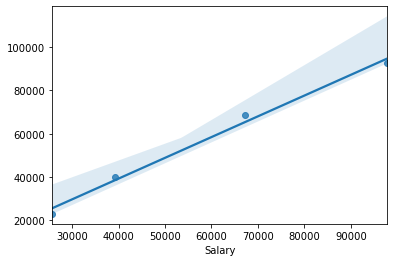

In [15]:
sns.regplot(y_test,predictions)

In [16]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     139.6
Date:                Thu, 15 Jul 2021   Prob (F-statistic):             0.0634
Time:                        16:57:29   Log-Likelihood:                -49.840
No. Observations:                   6   AIC:                             109.7
Df Residuals:                       1   BIC:                             108.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.792e+04   1.59e+05  

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
